In [3]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [4]:
n = 150

#for X
sample1 = stats.chi2(2).rvs(n) 

mean1 = np.mean(sample1)
var1 = np.var(sample1, ddof = 1)
std1 = np.std(sample1)

print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n = %.3f" % (mean1, var1, std1, n))

X1: mean1 = 2.012; var1 = 4.197; std1 = 2.042; n = 150.000


In [5]:
#for X2

sample2 = stats.norm(loc=3, scale=1).rvs(n) 

mean2 = np.mean(sample2)
var2 = np.var(sample2, ddof = 1)
std2 = np.std(sample2)

print("X2: mean1 = %.3f; var2 = %.3f; std2 = %.3f; n = %.3f" % (mean2, var2, std2, n))

X2: mean1 = 2.890; var2 = 0.896; std2 = 0.943; n = 150.000


In [21]:
np.max(sample1)

13.977807263728836

In [22]:
#KK

r = stats.pearsonr(sample1, sample2)
p = stats.spearmanr(sample1, sample2) #спирмен
t = stats.kendalltau(sample1, sample2) #кендалл
print(r)
print(p)
print(t)

PearsonRResult(statistic=-0.0024272631935731218, pvalue=0.9764824578228516)
SignificanceResult(statistic=-0.037937686119383085, pvalue=0.6448567695389148)
SignificanceResult(statistic=-0.026756152125279643, pvalue=0.6270603924214628)


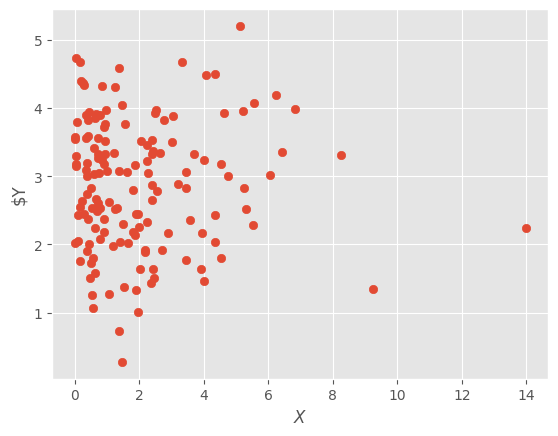

In [23]:
plt.scatter(sample1, sample2)
plt.ylabel('$Y')
plt.xlabel('$X$');

array([[ 5., 27., 39., 36.,  8.],
       [ 0.,  7., 11.,  6.,  4.],
       [ 0.,  0.,  1.,  4.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

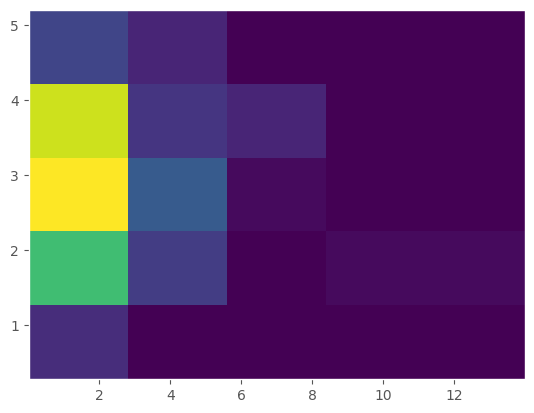

In [24]:
res = plt.hist2d(sample1, sample2, bins = 5)
res[0]

In [10]:
chi2, pv, ddof, array = stats.chi2_contingency(res[0])
print(chi2, pv)
array

16.233647996060427 0.43677622419430967


array([[3.83333333e+00, 2.76000000e+01, 3.91000000e+01, 3.52666667e+01,
        9.20000000e+00],
       [9.33333333e-01, 6.72000000e+00, 9.52000000e+00, 8.58666667e+00,
        2.24000000e+00],
       [1.66666667e-01, 1.20000000e+00, 1.70000000e+00, 1.53333333e+00,
        4.00000000e-01],
       [3.33333333e-02, 2.40000000e-01, 3.40000000e-01, 3.06666667e-01,
        8.00000000e-02],
       [3.33333333e-02, 2.40000000e-01, 3.40000000e-01, 3.06666667e-01,
        8.00000000e-02]])

In [11]:
n_row = []
n_col = [0, 0, 0, 0, 0]
for row in res[0]:
    n_row.append(sum(row))
for i in range(len(res[0])):
    for j in range(len(res[0][i])):
        n_col[j] += res[0][i][j] 

#p = np.array(n_row)/n
#q = np.array(n_col)/n

teoretic_table = [[0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col)]

for i in range(len(n_row)):
    for j in range(len(n_col)):
        teoretic_table[i][j] = n_row[i] * n_col[j] / n    
for i in teoretic_table:
    print(i)

    
z = 0
for i in range(len(n_row)):
    for j in range(len(n_col)):
        z += ((res[0][i][j] - teoretic_table[i][j])**2/teoretic_table[i][j])
        
print(z)

[3.8333333333333335, 27.6, 39.1, 35.266666666666666, 9.2]
[0.9333333333333333, 6.72, 9.52, 8.586666666666666, 2.24]
[0.16666666666666666, 1.2, 1.7, 1.5333333333333334, 0.4]
[0.03333333333333333, 0.24, 0.34, 0.30666666666666664, 0.08]
[0.03333333333333333, 0.24, 0.34, 0.30666666666666664, 0.08]
16.233647996060427


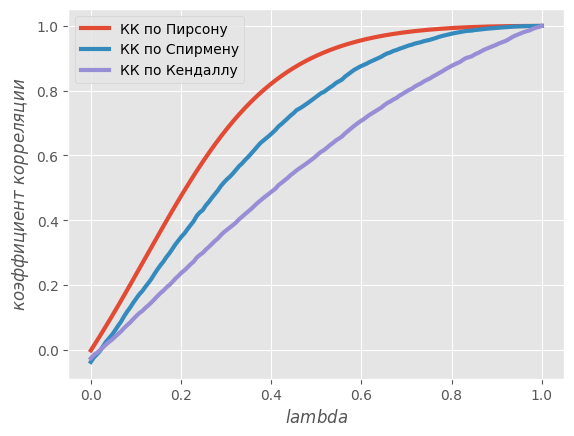

In [13]:
x = np.linspace(0, 1, 150)
y = []
y_p = []
y_t = []

for j in range(0, 150):
  sample_U = []
  lam = x[j] 
  for i in range(0, 150):
    u = lam * sample1[i] + (1 - lam) * sample2[i]
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');


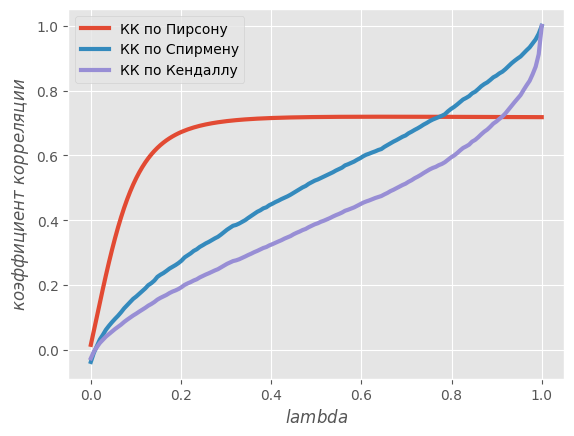

In [14]:
x = np.linspace(0, 1, 150)
y = []
y_p = []
y_t = []

for j in range(0, 150):
  sample_U = []
  lam = x[j] 
  for i in range(0, 150):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

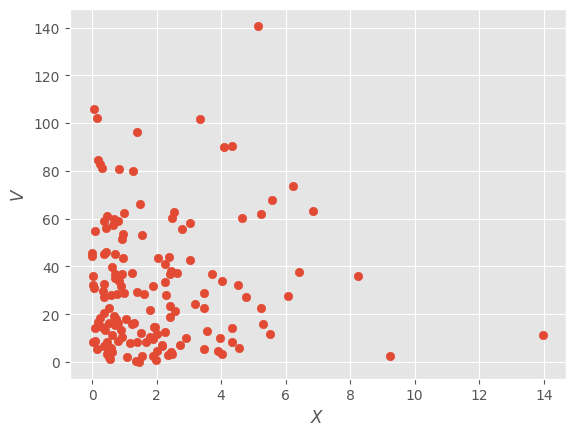

In [15]:
lam = 0
sample_U = []
for i in range(0, 150):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

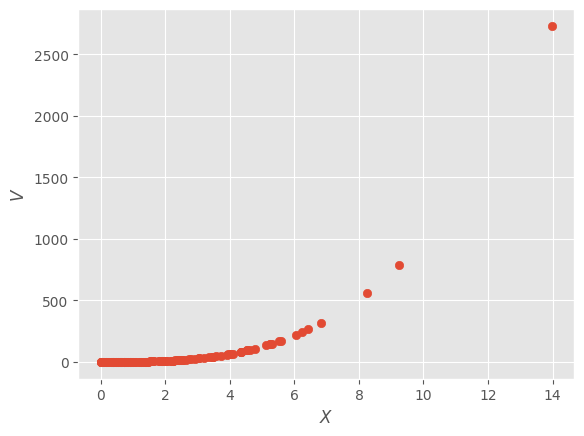

In [16]:
lam = 1
sample_U = []
for i in range(0, 150):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

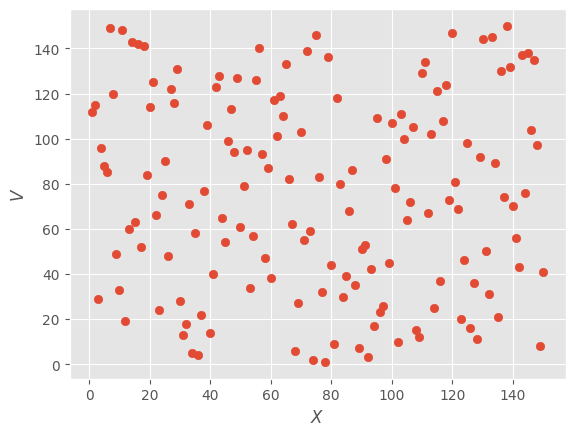

In [17]:
lam = 0
sample_V = []
for i in range(0, 150):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');

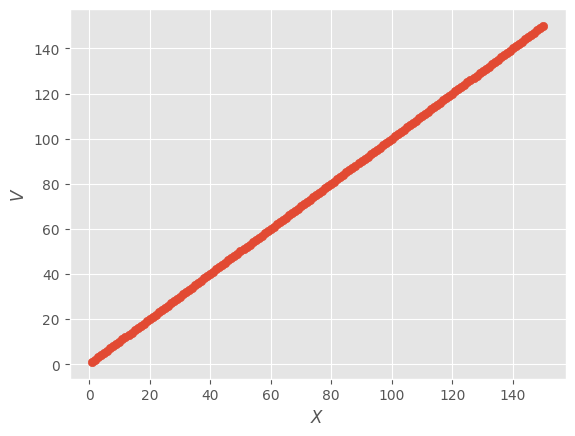

In [18]:
lam = 1
sample_V = []
for i in range(0, 150):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');